In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [20]:
dataset1 = pd.read_csv('/content/data - Sheet1.csv',header=None)
X = dataset1[0].values
y = dataset1[1].values
print(dataset1)

     0    1
0    1    2
1    3    6
2    5   10
3    9   18
4   11   22
5   13   26
6   15   30
7   17   34
8   19   38
9   21   42
10  23   46
11  25   50
12  27   54
13  29   58
14  31   62
15  33   66
16  35   70
17  37   74
18  39   78
19  41   82
20  43   86
21  45   90
22  47   94
23  49   98
24  51  102
25  53  106
26  55  110
27  57  114
28  59  118


In [21]:
X=X.reshape(-1,1)
y=y.reshape(-1,1)
X.shape,y.shape

((29, 1), (29, 1))

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=33)

In [23]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [25]:
### Name: HARINI R
### Register Number: 212223100010
class NeuralNet(nn.Module):
  def __init__(self):
        super().__init__()
        self.fc1=nn.Linear(1,10)
        self.fc2=nn.Linear(10,14)
        self.fc3=nn.Linear(14,1)
        self.relu=nn.ReLU()
        self.history = {'loss': []}
  def forward(self,x):
    x=self.relu(self.fc1(x))
    x=self.relu(self.fc2(x))
    x=self.fc3(x)
    return x


In [26]:
# Initialize the Model, Loss Function, and Optimizer
# Write your code here
ai_brain=NeuralNet()
criterion=nn.MSELoss()
optimizer=optim.RMSprop(ai_brain.parameters(),lr=0.001)

In [27]:
# Name: SHRI SAI ARAVIND R
# Register Number: 212223040197
def train_model(ai_brain, X_train, y_train, criterion, optimizer, epochs=2000):
    # Write your code here
    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = ai_brain(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

        ai_brain.history['loss'].append(loss.item())
        if epoch % 200 == 0:
            print(f'Epoch [{epoch}/{epochs}], Loss: {loss.item():.6f}')

In [28]:
train_model(ai_brain, X_train_tensor, y_train_tensor, criterion, optimizer)

Epoch [0/2000], Loss: 4938.029785
Epoch [200/2000], Loss: 3245.138916
Epoch [400/2000], Loss: 1364.895630
Epoch [600/2000], Loss: 548.479431
Epoch [800/2000], Loss: 438.739502
Epoch [1000/2000], Loss: 317.329987
Epoch [1200/2000], Loss: 184.297928
Epoch [1400/2000], Loss: 81.956398
Epoch [1600/2000], Loss: 20.447065
Epoch [1800/2000], Loss: 2.208367


In [29]:
with torch.no_grad():
    test_loss = criterion(ai_brain(X_test_tensor), y_test_tensor)
    print(f'Test Loss: {test_loss.item():.6f}')

Test Loss: 1.699927


In [30]:
loss_df = pd.DataFrame(ai_brain.history)

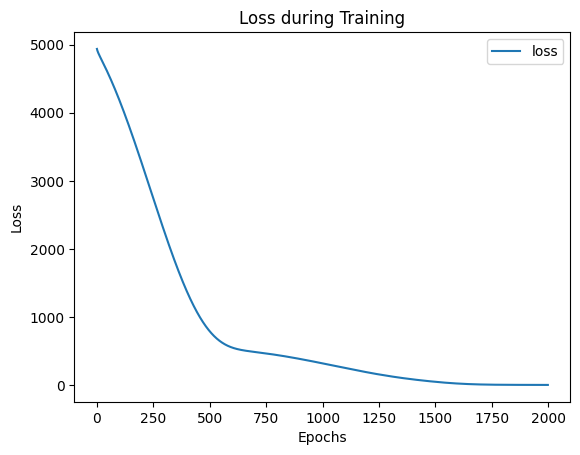

In [31]:
import matplotlib.pyplot as plt
loss_df.plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss during Training")
plt.show()

In [32]:
X_n1_1 = torch.tensor([[9]], dtype=torch.float32)
prediction = ai_brain(torch.tensor(scaler.transform(X_n1_1), dtype=torch.float32)).item()
print(f'Prediction: {prediction}')

Prediction: 17.561861038208008


In [33]:
X_n1_1 = torch.tensor([[12]], dtype=torch.float32)
prediction = ai_brain(torch.tensor(scaler.transform(X_n1_1), dtype=torch.float32)).item()
print(f'Prediction: {prediction}')

Prediction: 23.60255241394043
